### Assignment 4 - Bayesian Models and KNN

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we will continue to build more models to detect accounting fraud using financial statement features. <br>
The first 10 questions are from Assignment 3. You can copy your code here. Make sure you run them before you proceed to Assignment 4.<br>
<b>Assignment 4 starts from Q11.</b>


The data was collected by Bao et al. (2020) based on the detected material accounting misstatements disclosed in the SEC’s Accounting and Auditing Enforcement Releases (AAERs). <br>
The dataset covers all publicly listed U.S. firms over the period 1990– 2014. The variable name of the fraud label is "misstate" (1 denotes fraud, and 0 denotes non-fraud). <br>
We will use both raw financial data from the financial statements and the financial ratios that are used to evaluate the financial performance of a company for detection.<br>

You may find the description of variables in the Word document.

1. Import the libraries

In [2]:
# imported the necessary libraries required to run the model:
import pandas as pd
import statsmodels.api as sm
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Read in the dataset and display basic information about the dataset.

In [3]:
# Read the dataset and printed in the name of acc_fraud:
fraud = pd.read_csv('AccountingFraud.csv') 

In [4]:
fraud.info() # code provdides the complete detail of the acc_fraud dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   misstate     146045 non-null  int64  
 2   act          146045 non-null  float64
 3   ap           146045 non-null  float64
 4   at           146045 non-null  float64
 5   ceq          146045 non-null  float64
 6   che          146045 non-null  float64
 7   cogs         146045 non-null  float64
 8   csho         146045 non-null  float64
 9   dlc          146045 non-null  float64
 10  dltis        146045 non-null  float64
 11  dltt         146045 non-null  float64
 12  dp           146045 non-null  float64
 13  ib           146045 non-null  float64
 14  invt         146045 non-null  float64
 15  ivao         146045 non-null  float64
 16  ivst         146045 non-null  float64
 17  lct          146045 non-null  float64
 18  lt           146045 non-

In [5]:
fraud.shape # shows the rows and columns of the dataset.

(146045, 44)

In [6]:
fraud.columns # defines all the columns.

Index(['fyear', 'misstate', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho',
       'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt',
       'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt',
       'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv',
       'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm', 'dpi', 'reoa',
       'EBIT', 'ch_fcf'],
      dtype='object')

In [43]:
fraud.head(146045) # first 10 rows of the acc_fraud dataset.

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146039,2014,0,167.320,4.021,1260.060,972.016,159.564,0.000,3896.103,0.000,...,0.015362,-1.718931,0.435251,0.009248,1,2.626149,0.820630,-0.180677,-0.009215,0.030761
146040,2014,0,262.600,12.400,1234.800,194.100,166.200,214.400,97.748,23.200,...,0.751944,0.560406,0.127217,-0.050591,1,0.103693,0.829680,-0.327178,-0.008179,-0.261606
146041,2014,0,1578.400,106.700,4557.600,2459.600,997.300,324.400,182.067,15.100,...,0.742781,-0.118178,0.031360,0.095355,1,0.581796,0.743084,-0.077826,0.000461,-0.296702
146042,2014,0,973.800,249.500,2015.900,-4.800,290.500,1185.500,95.831,49.600,...,0.751129,0.004207,-0.037925,0.072050,1,-0.000903,1.063878,-0.002877,0.153133,0.065569


3. Explore the variable 'misstate' with a graph. What do you observe?

In [8]:
type('misstate') # class of variable 'misstate'.

str

In [9]:
# Shows the unique values of the variable 'misstate'.
misstate = fraud['misstate'].unique()
misstate


array([0, 1])

In [10]:
# Provides the total number of count for the unique values of the variable 'misstate'.
misstate_count = fraud['misstate'].value_counts()
misstate_count

0    145081
1       964
Name: misstate, dtype: int64

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of Non-Fraud and Fraud Instances')

Text(0.5, 0, 'Misstate (0: Non-Fraud, 1: Fraud)')

Text(0, 0.5, 'Count')

([<matplotlib.axis.XTick at 0x12785f450>,
 [Text(0, 0, 'Non-Fraud'), Text(1, 0, 'Fraud')])

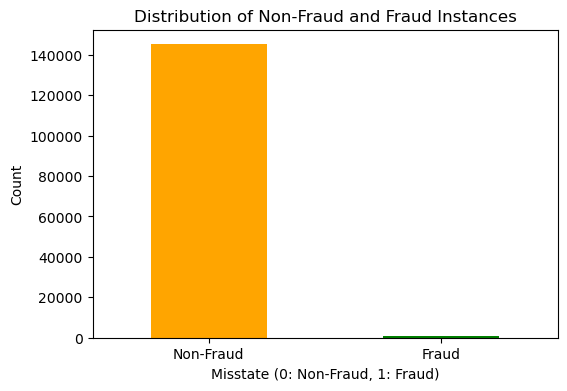

In [11]:
plt.figure(figsize=(6, 4))
misstate_count.plot(kind='bar', color=['orange', 'green'])
plt.title('Distribution of Non-Fraud and Fraud Instances')  
plt.xlabel('Misstate (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)  
plt.show()

4. Next we sum the number of fraud cases by year and make a line graph.<br>
First we need to use .groupby() method to do the sum. We did not go over this in class. I explain here.
Then you can use the result to create a line graph.

In [12]:
fraud_by_year = fraud.groupby('fyear')['misstate'].sum().reset_index()
fraud_by_year

# Groupby method group the data observations by the given variable 'fyear'
# into groups.
# Then the sum() will sum the variable 'misstate'
# reset_index() is to transform the result into a dataframe

,fyear,misstate
0,1990,15
1,1991,27
2,1992,26
3,1993,30
4,1994,23
5,1995,22
6,1996,33
7,1997,42
8,1998,56
9,1999,73


Save the output of the code above and make a line graph based on it. What do you observe?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Number of Fraud Cases Each Year from 1990 to 2014')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Fraud Cases')

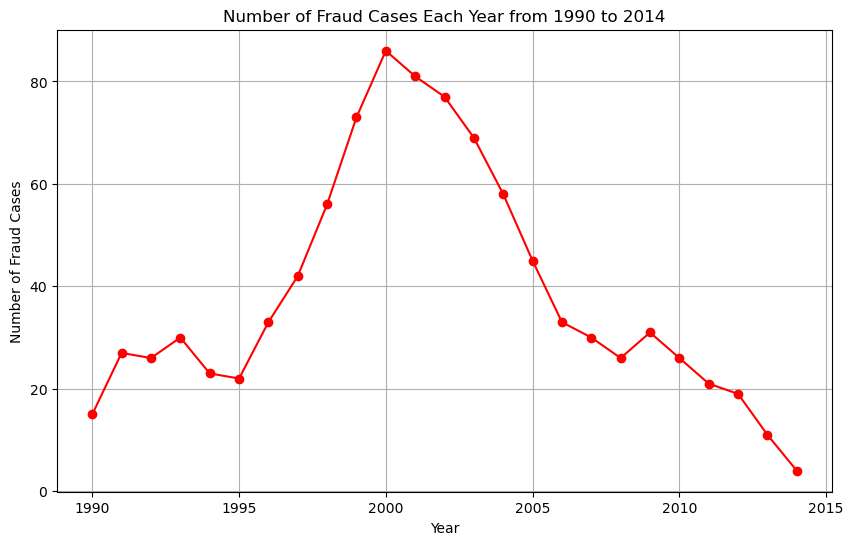

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(fraud_by_year['fyear'], fraud_by_year['misstate'], marker='o', color='red', linestyle='-')
plt.title('Number of Fraud Cases Each Year from 1990 to 2014')
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')
plt.grid(True)
plt.show()

5. Missing values. You may notice that some variables have missing values. <br>
Ideally, we need to handle missing values carefully. We will explore that in the future if we have the chance.<br>
For now, we just simply drop the observations with missing values.

In [14]:
fraud = fraud.dropna()
fraud

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146039,2014,0,167.320,4.021,1260.060,972.016,159.564,0.000,3896.103,0.000,...,0.015362,-1.718931,0.435251,0.009248,1,2.626149,0.820630,-0.180677,-0.009215,0.030761
146040,2014,0,262.600,12.400,1234.800,194.100,166.200,214.400,97.748,23.200,...,0.751944,0.560406,0.127217,-0.050591,1,0.103693,0.829680,-0.327178,-0.008179,-0.261606
146041,2014,0,1578.400,106.700,4557.600,2459.600,997.300,324.400,182.067,15.100,...,0.742781,-0.118178,0.031360,0.095355,1,0.581796,0.743084,-0.077826,0.000461,-0.296702
146042,2014,0,973.800,249.500,2015.900,-4.800,290.500,1185.500,95.831,49.600,...,0.751129,0.004207,-0.037925,0.072050,1,-0.000903,1.063878,-0.002877,0.153133,0.065569


After dropping the missing values we can see that the number of observations has decreased down to 126483 rows and 44 columns without the missing values.

6. Now let's fit logistic regression models. First, we only use the 14 financial ratio variables as the independent variables. You may find the definitions of them in the Word document.

Prepare the data.

In [15]:
import patsy
y_14, X_14 = patsy.dmatrices('misstate ~ dch_wc + ch_rsst + dch_rec + dch_inv + soft_assets +dpi+ '
           'ch_cs + ch_cm + ch_roa+ch_fcf+reoa+EBIT + issue+bm',
                      data = fraud,
                      return_type = 'dataframe')
y_14.head()
X_14.head()

,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Intercept,dch_wc,ch_rsst,dch_rec,dch_inv,soft_assets,dpi,ch_cs,ch_cm,ch_roa,ch_fcf,reoa,EBIT,issue,bm
0,1.0,0.069595,0.046043,0.041935,0.033034,0.312448,0.873555,0.095082,0.082631,-0.019761,-0.042140,0.167620,0.161961,1.0,0.413170
1,1.0,-0.065604,-0.240937,-0.006248,-0.026684,0.315904,0.745139,0.188832,-0.211389,-0.117832,0.100228,-0.428957,-0.157888,1.0,0.157887
2,1.0,0.092822,0.020143,0.002156,0.002746,0.605342,1.015131,0.097551,-0.105780,0.091206,0.066348,0.394768,0.063681,1.0,2.231337
3,1.0,0.014060,0.035120,0.035583,0.008332,0.793068,1.026261,-0.005725,-0.249704,0.017545,-0.017358,0.094822,0.088347,1.0,1.043582
4,1.0,-0.540503,-0.575325,-0.102153,-0.222022,0.869182,0.598443,-0.231536,-1.674893,-0.466667,0.130349,-0.942379,-0.700821,0.0,-1.602508


In [16]:
y_14.columns
X_14.columns

Index(['misstate'], dtype='object')

Index(['Intercept', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm'],
      dtype='object')

7. Fit the model

In [17]:
logit_model_14 = sm.Logit(y_14['misstate'], X_14[['Intercept', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm']])
logit_res_14 = logit_model_14.fit()
logit_res_14.summary()

Optimization terminated successfully.
         Current function value: 0.040796
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126468
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                 0.04303
Time:                        00:23:42   Log-Likelihood:                -5160.1
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                 3.716e-90
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.1554      0.222    -32.176      0.000      -7.591      -6.720
dch_wc         -0.9463      0.366     -2.586      0.010      -1.663      -0.229
ch_rsst         0.9744      0.283      3.446      0.001       0.420       1.529
dch_rec         2.0044      0.464      4.318      0.000       1.095       2.914
dch_inv         1.2629      0.640      1.973      0.048       0.009       2.517
soft_assets     1.8892      0.149     12.680      0.000       1.597       2.181
dpi             0.0457      0.077      0.591      0.555      -0.106       0.197
ch_cs           0.0576      0.026      2.215      0.027       0.007       0.108
ch_cm          -0.0024      0.015     -0.163      0.870      -0.031       0.026
ch_roa         -0.5019      0.218     -2.307      0.021      -0.928      -0.075
ch_fcf          0.4192      0.237      1.768      0.077      -0.046       0.884
reoa            0.2432      0.040      6.075      0.000       0.165       0.322
EBIT           -0.4304      0.138     -3.125      0.002      -0.700      -0.160
issue           1.2184      0.184      6.630      0.000       0.858       1.579
bm             -0.0688      0.033     -2.083      0.037      -0.134      -0.004
===============================================================================
"""

8. Make the predictions for probabilities and classify (using 0.5 cut-off).

In [18]:
predicted_p14 = logit_res_14.predict(X_14)
predicted_p14

0         0.005159
1         0.004236
2         0.007358
3         0.012228
4         0.003841
            ...   
146039    0.001856
146040    0.012347
146041    0.013226
146042    0.010997
146044    0.003742
Length: 126483, dtype: float64

In [19]:
predicted_c14 = (predicted_p14 >= 0.5).astype(int)
predicted_c14[:146044]

0         0
1         0
2         0
3         0
4         0
         ..
146039    0
146040    0
146041    0
146042    0
146044    0
Length: 126483, dtype: int64

9. Calculate the accuracy rate.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_14['misstate'], predicted_c14)
confusion_matrix = confusion_matrix(y_14['misstate'], predicted_c14)
classification_report = classification_report(y_14['misstate'], predicted_c14, zero_division=1)

In [21]:
print(accuracy)
print(confusion_matrix)
print(classification_report)

0.992813263442518
[[125574      0]
 [   909      0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    125574
         1.0       1.00      0.00      0.00       909

    accuracy                           0.99    126483
   macro avg       1.00      0.50      0.50    126483
weighted avg       0.99      0.99      0.99    126483



The output represents the evaluation metrics of a binary classification model. The model achieves a high accuracy of approximately 99.28%, correctly predicting the majority class (0.0) for the majority of instances. However, a closer examination reveals a significant imbalance in class distribution, with no instances correctly predicted for the minority class (1.0). This imbalance results in a precision of 0.99 for the majority class but a recall and F1-score of 0.00 for the minority class. The model's inability to identify instances of the minority class indicates a severe limitation, suggesting the need for addressing class imbalance through techniques such as resampling or adjusting class weights to improve its performance on predicting the minority class.

10. Repeat 6-9 using all 42 (28+14) variables. Which model gives the best accuracy rate?

In [22]:
import patsy
y_fraud, X_fraud = patsy.dmatrices('misstate ~ act+ap+ at+ ceq+ che+ cogs+ +csho+dlc+ dltis+dltt+ dp+ ib+ invt+ ivao+ ivst+ lct+ lt+ni+ ppegt+ pstk+ +re+ rect+ +sale+ sstk+ txp+txt+xint+ prcc_f+dch_wc + ch_rsst + dch_rec + dch_inv + soft_assets +dpi+ '
           'ch_cs + ch_cm + ch_roa+ch_fcf+reoa+EBIT + issue+bm',
                      data = fraud,
                      return_type = 'dataframe')
y_fraud.head()
X_fraud.head()

,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Intercept,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,dpi,ch_cs,ch_cm,ch_roa,ch_fcf,reoa,EBIT,issue,bm
0,1.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,...,0.312448,0.873555,0.095082,0.082631,-0.019761,-0.042140,0.167620,0.161961,1.0,0.413170
1,1.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,...,0.315904,0.745139,0.188832,-0.211389,-0.117832,0.100228,-0.428957,-0.157888,1.0,0.157887
2,1.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,...,0.605342,1.015131,0.097551,-0.105780,0.091206,0.066348,0.394768,0.063681,1.0,2.231337
3,1.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,...,0.793068,1.026261,-0.005725,-0.249704,0.017545,-0.017358,0.094822,0.088347,1.0,1.043582
4,1.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,...,0.869182,0.598443,-0.231536,-1.674893,-0.466667,0.130349,-0.942379,-0.700821,0.0,-1.602508


In [23]:
y_fraud.columns
X_fraud.columns

Index(['misstate'], dtype='object')

Index(['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm'],
      dtype='object')

In [24]:
logit_model_fraud = sm.Logit(y_fraud['misstate'], X_fraud[['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm']])
logit_res_fraud = logit_model_fraud.fit()
logit_res_fraud.summary()

Optimization terminated successfully.
         Current function value: 0.040220
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126440
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                 0.05656
Time:                        00:23:44   Log-Likelihood:                -5087.2
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                7.739e-102
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.1695      0.225    -31.796      0.000      -7.611      -6.728
act             0.0002   6.59e-05      3.130      0.002    7.71e-05       0.000
ap              0.0003   6.95e-05      4.337      0.000       0.000       0.000
at          -4.644e-06   6.77e-05     -0.069      0.945      -0.000       0.000
ceq          1.881e-05   6.82e-05      0.276      0.783      -0.000       0.000
che            -0.0002   7.46e-05     -2.125      0.034      -0.000   -1.23e-05
cogs        -2.204e-05   2.16e-05     -1.022      0.307   -6.43e-05    2.02e-05
csho         4.306e-05   2.22e-05      1.935      0.053   -5.45e-07    8.67e-05
dlc         -4.019e-05   7.39e-05     -0.544      0.586      -0.000       0.000
dltis        1.254e-06   2.57e-05      0.049      0.961   -4.91e-05    5.16e-05
dltt         3.781e-05   3.82e-05      0.990      0.322   -3.71e-05       0.000
dp             -0.0002      0.000     -1.293      0.196      -0.000    8.17e-05
ib             -0.0001      0.000     -1.035      0.300      -0.000    9.88e-05
invt           -0.0001   7.07e-05     -1.537      0.124      -0.000    2.99e-05
ivao         2.692e-06   1.79e-05      0.151      0.880   -3.23e-05    3.77e-05
ivst        -8.048e-05   7.87e-05     -1.023      0.306      -0.000    7.38e-05
lct            -0.0001   7.15e-05     -1.574      0.116      -0.000    2.76e-05
lt          -4.851e-05   7.56e-05     -0.642      0.521      -0.000    9.96e-05
ni          -3.683e-06   8.77e-05     -0.042      0.967      -0.000       0.000
ppegt       -1.801e-06    7.8e-06     -0.231      0.817   -1.71e-05    1.35e-05
pstk        -9.442e-05      0.000     -0.348      0.728      -0.001       0.000
re           -1.27e-05   7.89e-06     -1.611      0.107   -2.82e-05    2.75e-06
rect           -0.0001   6.69e-05     -1.628      0.103      -0.000    2.22e-05
sale         1.285e-05   2.03e-05      0.632      0.527    -2.7e-05    5.27e-05
sstk            0.0002   5.15e-05      3.466      0.001    7.75e-05       0.000
txp          6.482e-05      0.000      0.310      0.756      -0.000       0.000
txt         -1.053e-05      0.000     -0.089      0.929      -0.000       0.000
xint            0.0012      0.000      4.746      0.000       0.001       0.002
prcc_f          0.0010      0.000      3.998      0.000       0.001       0.001
dch_wc         -0.9484      0.372     -2.547      0.011      -1.678      -0.218
ch_rsst         0.9954      0.286      3.482      0.000       0.435       1.556
dch_rec         2.1294      0.472      4.511      0.000       1.204       3.055
dch_inv         1.3559      0.654      2.074      0.038       0.075       2.637
soft_assets     1.8267      0.154     11.826      0.000       1.524       2.129
dpi             0.0484      0.078      0.617      0.537      -0.105       0.202
ch_cs           0.0594      0.026      2.266      0.023       0.008       0.111
ch_cm          -0.0030      0.015     -0.200      0.842      -0.032       0.026
ch_roa         -0.4986      0.220     -2.

In [25]:
predicted_fraud = logit_res_fraud.predict(X_fraud)
predicted_fraud

0         0.004817
1         0.003891
2         0.006725
3         0.011058
4         0.003455
            ...   
146039    0.002191
146040    0.012277
146041    0.017714
146042    0.011264
146044    0.003752
Length: 126483, dtype: float64

In [26]:
predicted_classes_fraud = (predicted_fraud >= 0.5).astype(int)
predicted_classes_fraud[:146044]

0         0
1         0
2         0
3         0
4         0
         ..
146039    0
146040    0
146041    0
146042    0
146044    0
Length: 126483, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_14['misstate'], predicted_classes_fraud)
confusion_matrix = confusion_matrix(y_14['misstate'], predicted_classes_fraud)
classification_report = classification_report(y_14['misstate'], predicted_classes_fraud, zero_division=1)

print(accuracy)
print(confusion_matrix)
print(classification_report)

0.9928369820450179
[[125573      1]
 [   905      4]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    125574
         1.0       0.80      0.00      0.01       909

    accuracy                           0.99    126483
   macro avg       0.90      0.50      0.50    126483
weighted avg       0.99      0.99      0.99    126483



The model achieved 99.28 % accuracy, correctly identifying negative cases but struggling with positive ones. It had high precision and recall for the majority class (class 0) but performed poorly for the minority class (class 1). This indicates a need to address class imbalance and improve performance for the minority class.

Comparing the accuracy rates provided in the accuracy reports:

Model using 14 financial ratio variables: Accuracy: 0.992813263442518,
Model using all 42 variables (28 + 14): Accuracy: 0.9928369820450179

Given the two values provided, 0.992813263442518 and 0.9928369820450179, both are very high, indicating a strong relationship between the independent and dependent variables in the respective models. However, the difference between them is minimal.

### Assignment 4 starts from here.

11. Let's split the dataset into two parts. The first part includes records from 1990-2012 and the second part includes 2013-2014. Let's name them Fraud_train and Fraud_test respectively. You can use 'fyear' variable to do that.

In [28]:
# Splitting the dataset into two parts using the train test split, where the first part'fyear' records 1990-2012 and the second records 2013-2014.
fraud_train = fraud[fraud['fyear'] <= 2012]
fraud_train.head(117228)
fraud_train.shape

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134763,2012,0,597.134,69.827,6225.114,2908.515,354.687,566.060,131.725,169.780,...,0.076808,0.525387,-0.290321,-0.040022,1,1.479232,0.743570,-0.093463,0.010150,-0.011634
134764,2012,0,121.895,8.757,323.466,-22.570,52.404,35.458,54.019,12.226,...,0.792875,0.310069,-0.002739,-0.267668,1,-0.026394,0.865286,0.343053,0.241525,-1.141097
134765,2012,0,18.563,0.313,20.096,19.018,18.365,9.032,5.299,0.000,...,0.080514,-1.710145,-2.565644,0.497413,1,0.371722,0.582483,-0.626692,-0.513834,0.381808
134767,2012,0,924.446,30.230,4893.928,2315.248,653.365,331.495,216.902,218.750,...,0.098110,9.600000,0.195731,0.008387,1,1.130738,0.151757,-0.007451,0.039565,0.108911


(117228, 44)

In [29]:
fraud_train.columns

Index(['fyear', 'misstate', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho',
       'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt',
       'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt',
       'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv',
       'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm', 'dpi', 'reoa',
       'EBIT', 'ch_fcf'],
      dtype='object')

In [30]:
fraud_test = fraud[fraud['fyear'] > 2012]
fraud_test.head(9255)
fraud_test.shape

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
134771,2013,0,1116.900,171.100,2199.500,999.500,89.200,1581.400,39.560,69.700,...,0.771539,-0.057006,0.064649,0.008233,1,1.039729,0.942815,0.280382,0.066833,-0.022784
134772,2013,0,14323.000,1368.000,42278.000,-2731.000,10286.000,19084.000,261.069,1446.000,...,0.301173,0.066699,0.835780,0.023471,1,-0.414291,1.301848,-0.315247,-0.035196,-0.138445
134773,2013,0,124.772,23.108,348.536,170.406,22.661,134.576,25.587,9.922,...,0.872822,0.418072,0.538244,-0.095482,1,0.412325,0.867841,0.031386,0.022821,-0.512959
134774,2013,0,1768.723,94.634,2384.988,2047.685,874.289,1113.561,168.221,0.000,...,0.534583,-0.028476,-0.039106,0.076317,1,0.923565,0.874775,0.753875,0.069514,0.035702
134775,2013,0,1043.609,284.516,13508.686,4194.470,9.526,2192.597,110.182,693.549,...,0.193222,0.027290,-0.189115,0.001399,1,0.719361,1.018028,0.126379,0.062075,-0.018015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146039,2014,0,167.320,4.021,1260.060,972.016,159.564,0.000,3896.103,0.000,...,0.015362,-1.718931,0.435251,0.009248,1,2.626149,0.820630,-0.180677,-0.009215,0.030761
146040,2014,0,262.600,12.400,1234.800,194.100,166.200,214.400,97.748,23.200,...,0.751944,0.560406,0.127217,-0.050591,1,0.103693,0.829680,-0.327178,-0.008179,-0.261606
146041,2014,0,1578.400,106.700,4557.600,2459.600,997.300,324.400,182.067,15.100,...,0.742781,-0.118178,0.031360,0.095355,1,0.581796,0.743084,-0.077826,0.000461,-0.296702
146042,2014,0,973.800,249.500,2015.900,-4.800,290.500,1185.500,95.831,49.600,...,0.751129,0.004207,-0.037925,0.072050,1,-0.000903,1.063878,-0.002877,0.153133,0.065569


(9255, 44)

In [31]:
fraud_test.columns

Index(['fyear', 'misstate', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho',
       'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt',
       'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt',
       'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv',
       'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm', 'dpi', 'reoa',
       'EBIT', 'ch_fcf'],
      dtype='object')

12. Prepare data for model fitting using Fraud_train. y_train is still 'misstate'. For X_train, we use all 42 variables.

In [32]:
# prompt: Prepare data for model fitting using Fraud_train. y_train is still 'misstate'. For X_train, we use all 42 variables

y_train, X_train = patsy.dmatrices('misstate ~ act+ap+ at+ ceq+ che+ cogs+ +csho+dlc+ dltis+dltt+ dp+ ib+ invt+ ivao+ ivst+ lct+ lt+ni+ ppegt+ pstk+ +re+ rect+ +sale+ sstk+ txp+txt+xint+ prcc_f+dch_wc + ch_rsst + dch_rec + dch_inv + soft_assets +dpi+ '
           'ch_cs + ch_cm + ch_roa+ch_fcf+reoa+EBIT + issue+bm',
                      data = fraud_train,
                      return_type = 'dataframe')
y_train.head()
X_train.head()

,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Intercept,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,dpi,ch_cs,ch_cm,ch_roa,ch_fcf,reoa,EBIT,issue,bm
0,1.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,...,0.312448,0.873555,0.095082,0.082631,-0.019761,-0.042140,0.167620,0.161961,1.0,0.413170
1,1.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,...,0.315904,0.745139,0.188832,-0.211389,-0.117832,0.100228,-0.428957,-0.157888,1.0,0.157887
2,1.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,...,0.605342,1.015131,0.097551,-0.105780,0.091206,0.066348,0.394768,0.063681,1.0,2.231337
3,1.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,...,0.793068,1.026261,-0.005725,-0.249704,0.017545,-0.017358,0.094822,0.088347,1.0,1.043582
4,1.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,...,0.869182,0.598443,-0.231536,-1.674893,-0.466667,0.130349,-0.942379,-0.700821,0.0,-1.602508


In [33]:
y_train.columns
X_train.columns


Index(['misstate'], dtype='object')

Index(['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm'],
      dtype='object')

13. Import from ScikitLearn(sklearn) modules for logistic regression, LDA, QDA, NB and KNN. Also import modules for model evalution.

In [34]:
# Importing all the modules from Scikitlearn to build different models:

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

14. Fit a logistic model using data prepared in Q12. You can ignore the warning message.

In [35]:
logit_model_fraud_train = sm.Logit(y_train['misstate'], X_train[['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm']])
logit_res_fraud =  logit_model_fraud_train.fit()
logit_res_fraud.summary()

Optimization terminated successfully.
         Current function value: 0.042269
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               misstate   No. Observations:               117228
Model:                          Logit   Df Residuals:                   117185
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                 0.05702
Time:                        00:23:46   Log-Likelihood:                -4955.1
converged:                       True   LL-Null:                       -5254.7
Covariance Type:            nonrobust   LLR p-value:                 1.108e-99
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.0806      0.225    -31.429      0.000      -7.522      -6.639
act             0.0002   6.62e-05      3.519      0.000       0.000       0.000
ap              0.0003   7.05e-05      4.438      0.000       0.000       0.000
at           -1.91e-05   7.58e-05     -0.252      0.801      -0.000       0.000
ceq          3.103e-05   7.64e-05      0.406      0.684      -0.000       0.000
che            -0.0002   7.62e-05     -2.285      0.022      -0.000   -2.48e-05
cogs        -1.945e-05   2.23e-05     -0.871      0.384   -6.32e-05    2.43e-05
csho         4.347e-05   2.21e-05      1.971      0.049    2.51e-07    8.67e-05
dlc         -7.548e-05   7.42e-05     -1.018      0.309      -0.000    6.99e-05
dltis        6.381e-07   2.73e-05      0.023      0.981   -5.29e-05    5.42e-05
dltt         5.802e-05   3.96e-05      1.467      0.142   -1.95e-05       0.000
dp             -0.0001      0.000     -1.007      0.314      -0.000       0.000
ib             -0.0001      0.000     -1.006      0.314      -0.000       0.000
invt           -0.0001   7.18e-05     -1.678      0.093      -0.000    2.02e-05
ivao         2.973e-06   1.85e-05      0.161      0.872   -3.33e-05    3.92e-05
ivst        -8.303e-05   7.81e-05     -1.063      0.288      -0.000    7.01e-05
lct            -0.0001   6.97e-05     -1.691      0.091      -0.000    1.87e-05
lt          -3.055e-05   8.27e-05     -0.369      0.712      -0.000       0.000
ni          -6.012e-06   9.33e-05     -0.064      0.949      -0.000       0.000
ppegt       -4.901e-06   8.69e-06     -0.564      0.573   -2.19e-05    1.21e-05
pstk           -0.0002      0.000     -0.527      0.598      -0.001       0.000
re          -1.142e-05   8.15e-06     -1.402      0.161   -2.74e-05    4.55e-06
rect           -0.0001   6.79e-05     -2.085      0.037      -0.000    -8.5e-06
sale         1.049e-05   2.08e-05      0.504      0.614   -3.03e-05    5.13e-05
sstk            0.0002   5.99e-05      3.486      0.000    9.13e-05       0.000
txp         -1.768e-05      0.000     -0.081      0.935      -0.000       0.000
txt         -7.604e-07      0.000     -0.007      0.995      -0.000       0.000
xint            0.0010      0.000      3.858      0.000       0.000       0.002
prcc_f          0.0012      0.000      4.405      0.000       0.001       0.002
dch_wc         -0.8774      0.376     -2.330      0.020      -1.615      -0.139
ch_rsst         0.9479      0.289      3.278      0.001       0.381       1.515
dch_rec         2.0824      0.473      4.402      0.000       1.155       3.010
dch_inv         1.3039      0.652      2.000      0.045       0.026       2.581
soft_assets     1.7984      0.156     11.503      0.000       1.492       2.105
dpi             0.0461      0.079      0.584      0.559      -0.108       0.201
ch_cs           0.0568      0.026      2.150      0.032       0.005       0.109
ch_cm          -0.0082      0.015     -0.553      0.580      -0.037       0.021
ch_roa         -0.4583      0.222     -2.

Significant Variables with p-values less than 0.05 are considered statistically significant:
act, ap, che, csho,	rect, sstk, xint, prcc_f, dch_wc, ch_rsst, dch_rec, dch_inv, soft_assets, ch_cs, ch_roa, reoa, EBIT, issue.

Non-Significant Variables with p-values greater than or equal to 0.05 are considered not statistically significant:
at, ceq, cogs, dlc, dltis, dltt, dp, ib, invt, ivao, ivst, lct, lt, ni, ppegt, pstk, re, sale, txp, txt, ch_cm, ch_fcf, bm.


15. Prepare y and X using the test dataset we generated in Q11. Let's name them y_test and X_test respectively.

In [36]:

y_test, X_test = patsy.dmatrices('misstate ~ act+ap+ at+ ceq+ che+ cogs+ +csho+dlc+ dltis+dltt+ dp+ ib+ invt+ ivao+ ivst+ lct+ lt+ni+ ppegt+ pstk+ +re+ rect+ +sale+ sstk+ txp+txt+xint+ prcc_f+dch_wc + ch_rsst + dch_rec + dch_inv + soft_assets +dpi+ '
           'ch_cs + ch_cm + ch_roa+ch_fcf+reoa+EBIT + issue+bm',
                      data = fraud_test,
                      return_type = 'dataframe')
y_test.head()
X_test.head()

,misstate
134771,0.0
134772,0.0
134773,0.0
134774,0.0
134775,0.0


,Intercept,act,ap,at,ceq,che,cogs,csho,dlc,dltis,...,soft_assets,dpi,ch_cs,ch_cm,ch_roa,ch_fcf,reoa,EBIT,issue,bm
134771,1.0,1116.900,171.100,2199.500,999.500,89.200,1581.400,39.560,69.700,0.000,...,0.771539,0.942815,-0.057006,0.064649,0.008233,-0.022784,0.280382,0.066833,1.0,1.039729
134772,1.0,14323.000,1368.000,42278.000,-2731.000,10286.000,19084.000,261.069,1446.000,5134.000,...,0.301173,1.301848,0.066699,0.835780,0.023471,-0.138445,-0.315247,-0.035196,1.0,-0.414291
134773,1.0,124.772,23.108,348.536,170.406,22.661,134.576,25.587,9.922,103.366,...,0.872822,0.867841,0.418072,0.538244,-0.095482,-0.512959,0.031386,0.022821,1.0,0.412325
134774,1.0,1768.723,94.634,2384.988,2047.685,874.289,1113.561,168.221,0.000,0.000,...,0.534583,0.874775,-0.028476,-0.039106,0.076317,0.035702,0.753875,0.069514,1.0,0.923565
134775,1.0,1043.609,284.516,13508.686,4194.470,9.526,2192.597,110.182,693.549,136.307,...,0.193222,1.018028,0.027290,-0.189115,0.001399,-0.018015,0.126379,0.062075,1.0,0.719361


In [37]:
y_test.columns
X_test.columns

Index(['misstate'], dtype='object')

Index(['Intercept', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc',
       'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni',
       'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint',
       'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm'],
      dtype='object')

16. Use X_test to make predictions. Note: The default predictions are labels, not probability.<br>
Get the accuracy score and confusion matrix.

In [38]:
# Make predictions using the trained logistic regression model
predicted_classes_fraud = logit_res_fraud.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
predicted_classes_fraud = (predicted_classes_fraud >= 0.5).astype(int)
predicted_classes_fraud

# Calculate the accuracy score
accuracy_fraud = accuracy_score(y_test['misstate'], predicted_classes_fraud)

# Calculate the confusion matrix
conf_matrix_fraud = confusion_matrix(y_test['misstate'], predicted_classes_fraud)

# Print the accuracy score and confusion matrix
print("Accuracy:", accuracy_fraud)
print("Confusion Matrix:", conf_matrix_fraud)



134771    0
134772    0
134773    0
134774    0
134775    0
         ..
146039    0
146040    0
146041    0
146042    0
146044    0
Length: 9255, dtype: int64

Accuracy: 0.998271204754187
Confusion Matrix: [[9239    2]
 [  14    0]]


Interpretation:
Out of a total of 9255 instances:

9239 instances were correctly classified as non-fraudulent (true negatives).
2 instances were incorrectly classified as fraudulent (false positives).
14 instances were incorrectly classified as non-fraudulent (false negatives).
0 instances were correctly classified as fraudulent (true positives).

This indicates that the model achieved an extremely high accuracy score of approximately 99.82%. It correctly classified almost all instances as non-fraudulent. However, it incorrectly classified 14 instances as non-fraudulent, which could be considered false negatives. There were no instances correctly classified as fraudulent.

17. Fit an LDA model and get the accuracy score and confusion matrix.

In [39]:
# Fit an LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train['misstate'])

# Make predictions using the trained LDA model
predicted_classes_lda = lda_model.predict(X_test)

# Calculate the accuracy score
accuracy_lda = accuracy_score(y_test['misstate'], predicted_classes_lda)

# Calculate the confusion matrix
conf_matrix_lda = confusion_matrix(y_test['misstate'], predicted_classes_lda)

# Print the accuracy score and confusion matrix
print("Accuracy:", accuracy_lda)
print("Confusion Matrix:", conf_matrix_lda)


LinearDiscriminantAnalysis()

Accuracy: 0.9885467314964884
Confusion Matrix: [[9149   92]
 [  14    0]]


Interpretation:
Out of a total of 9255 instances:

9149 instances were correctly classified as non-fraudulent (true negatives).
92 instances were incorrectly classified as fraudulent (false positives).
14 instances were incorrectly classified as non-fraudulent (false negatives).
0 instances were correctly classified as fraudulent (true positives).

This indicates that the LDA model achieved an accuracy score of approximately 98.85%. It performed relatively well in distinguishing between fraudulent and non-fraudulent cases, with a low number of false negatives compared to false positives.

18. Fit a QDA model and get the accuracy score and confusion matrix.

In [40]:
# prompt: Fit a QDA model and get the accuracy score and confusion matrix.

# Fit a QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train['misstate'])

# Make predictions using the trained QDA model
predicted_classes_qda = qda_model.predict(X_test)

# Calculate the accuracy score
accuracy_qda = accuracy_score(y_test['misstate'], predicted_classes_qda)

# Calculate the confusion matrix
conf_matrix_qda = confusion_matrix(y_test['misstate'], predicted_classes_qda)

# Print the accuracy score and confusion matrix
print("Accuracy score:", accuracy_qda)
print("Confusion matrix:")
print(conf_matrix_qda)

/Users/pujamadhav/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

Accuracy score: 0.9824959481361426
Confusion matrix:
[[9093  148]
 [  14    0]]


Interpretation:
Out of a total of 9255 instances:

9093 instances were correctly classified as non-fraudulent (true negatives).
148 instances were incorrectly classified as fraudulent (false positives).
14 instances were incorrectly classified as non-fraudulent (false negatives).
0 instances were correctly classified as fraudulent (true positives).

This indicates that the QDA model achieved an accuracy score of approximately 98.24%. However, it incorrectly classified a significant number of instances, particularly false positives, suggesting that it may not be as effective in distinguishing between fraudulent and non-fraudulent cases compared to other models.


19. Fit a NB model and get the accuracy score and confusion matrix.

In [41]:
# Fit a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train['misstate'])

# Make predictions using the trained Naive Bayes model
predicted_classes_nb = nb_model.predict(X_test)

# Calculate the accuracy score
accuracy_nb = accuracy_score(y_test['misstate'], predicted_classes_nb)

# Calculate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test['misstate'], predicted_classes_nb)

# Print the accuracy score and confusion matrix
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

GaussianNB()

Accuracy: 0.9236088600756348
Confusion Matrix:
[[8547  694]
 [  13    1]]


Interpretation:
Out of a total of 9255 instances:

8547 instances were correctly classified as non-fraudulent (true negatives).
694 instances were incorrectly classified as fraudulent (false positives).
13 instances were incorrectly classified as non-fraudulent (false negatives).
1 instance was correctly classified as fraudulent (true positives).

This means that the Naïve Bayes model achieved an accuracy score of approximately 92.36%. However, it incorrectly classified a significant number of instances, particularly false positives, indicating that it may not be as effective in distinguishing between fraudulent and non-fraudulent cases compared to other models.

20. Fit a KNN model and get the accuracy score and confusion matrix.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Convert DataFrame to numpy array (if needed)
X_train = X_train.values
X_test = X_test.values

# Fit the model
knn_res = knn.fit(X_train, y_train['misstate'])

# Make predictions
knn_pred = knn_res.predict(X_test)

# Calculate KNN performance
knn_accuracy = accuracy_score(y_test['misstate'], knn_pred)
knn_conf_matrix = confusion_matrix(y_test['misstate'], knn_pred)

print("KNN Accuracy:", knn_accuracy)
print("Confusion Matrix:")
print(knn_conf_matrix)

KNN Accuracy: 0.9971907077255537
Confusion Matrix:
[[9229   12]
 [  14    0]]


Interpretation:
Out of a total of 9255 instances:

9229 instances were correctly classified as non-fraudulent (true negatives).
12 instances were incorrectly classified as fraudulent (false positives).
14 instances were incorrectly classified as non-fraudulent (false negatives).
0 instances were correctly classified as fraudulent (true positives).

This means that the KNN model achieved a high accuracy score of approximately 99.72%. However, it incorrectly classified a small number of instances, especially false negatives, indicating that it may have some limitations in accurately predicting fraudulent cases.

Based on the provided accuracy scores, the performance of the models are as follows:

Logistic Regression: Accuracy score of 0.9982, 
LDA (Linear Discriminant Analysis): Accuracy score of 0.9885,
QDA (Quadratic Discriminant Analysis): Accuracy score of 0.9824,
KNN (K-Nearest Neighbors): Accuracy score of 0.9979,
Naïve Bayes: Accuracy score of 0.9236

Based on accuracy alone, the logistic regression model performs the best. However, it's also essential to consider other factors like computational efficiency, model complexity, and the business context when selecting the most suitable model for deployment.